SADFasf asf asfasf as ASf a

In [1]:
%load_ext autoreload
%autoreload 2

from loader import *
from models import *
from utils import *
from plotting import *


from tensorflow import keras
image_size = 512

model = unet(
    (image_size, image_size, 3), 
    conv_layers_dimensions=[16, 32, 64, 128],
    base_conv_layers_dimensions=[32, 32], 
    number_of_outputs=3,
    output_activation="softmax",
    loss=softmax_categorical
)

model.load_weights("E:\\Documents\\Anaconda\\Jupyterkod\\Exjobb\\Egen kod\\Exjobb\\Test simulations\\raw_output\\results\\kaggle_stacked_labels\\sequential_training_not_sequential_labels3-16-32-64-128.h5")

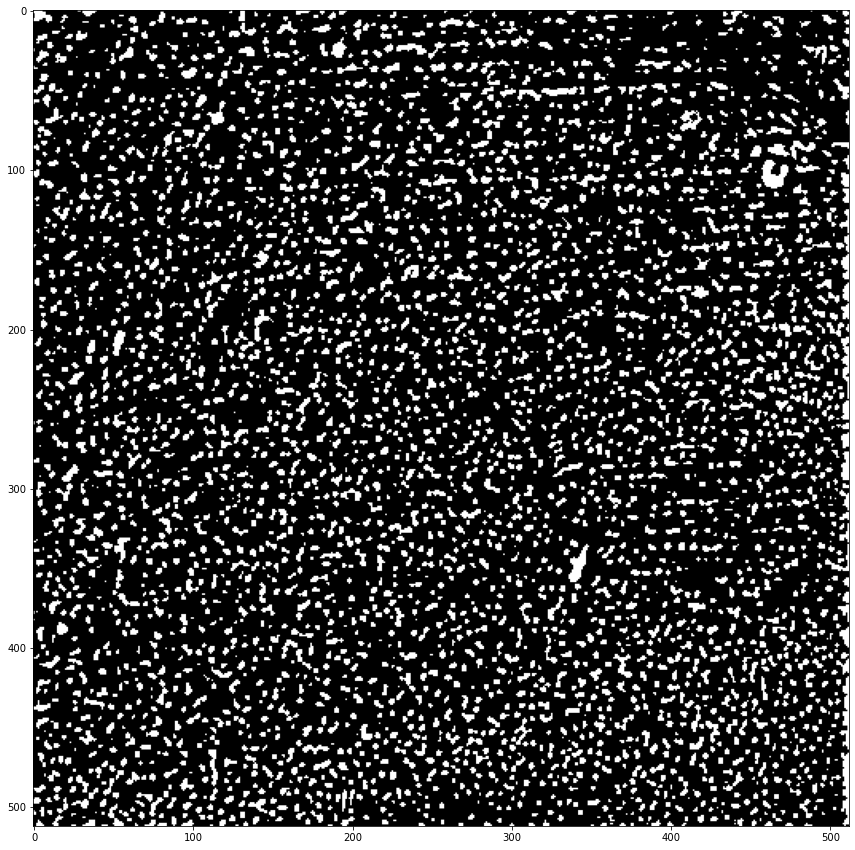

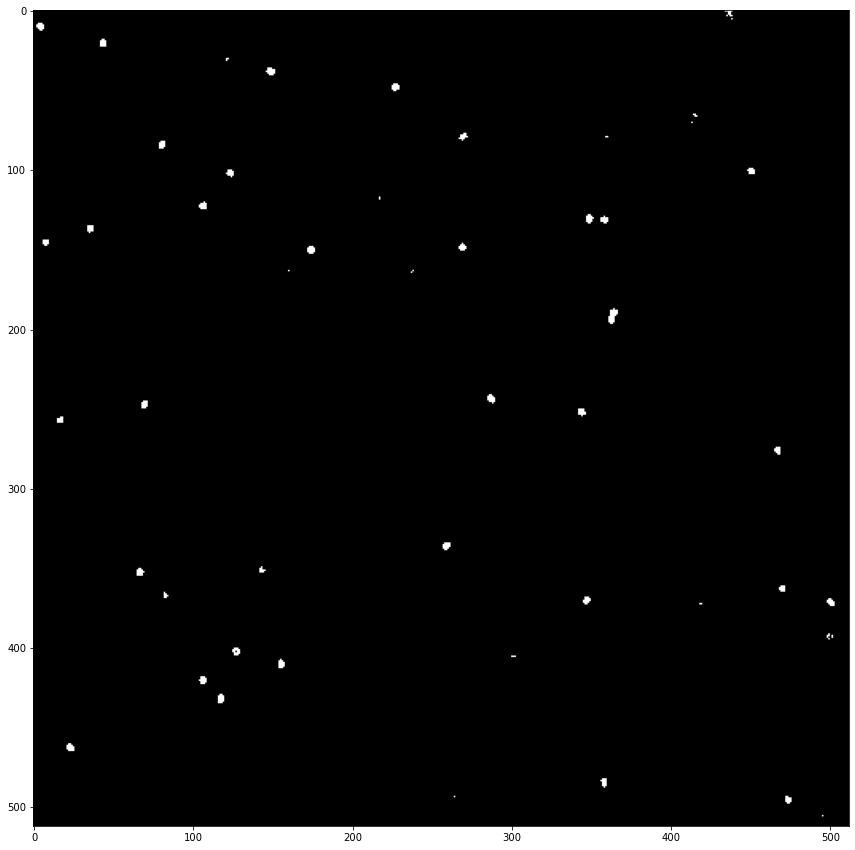

In [17]:
folder_path = 'E:\\Documents\\Anaconda\\Jupyterkod\\Exjobb\\Egen kod\\Exjobb\\Test simulations\\raw_output\\raw_output_images'

im_stack = get_image_stack(
    outputs=[0,1,2], 
    folder_path=folder_path, 
    frame_im0=1, 
    im_size_width=512, 
    im_size_height=512,
    im_resize_width=512, 
    im_resize_height=512,
    function_img=[],
    function_diff=[])

# plot_image_stack(im_stack)
# plot_prediction(model=model, im_stack=im_stack)
plt.figure(figsize=(15,15))
plt.imshow(model.predict(im_stack)[0,:,:,1]>0.9, cmap='gray')

plt.figure(figsize=(15,15))
plt.imshow(model.predict(im_stack)[0,:,:,2]>0.9, cmap='gray')

In [3]:
positions_small = extract_positions(
    no_of_frames=15, 
    outputs=[0,1,2], 
    folder_path=folder_path, 
    frame_im0=0, 
    im_size_width=512, 
    im_size_height=512,
    im_resize_width=512, 
    im_resize_height=512,
    model=model, 
    layer=1, 
    value_threshold=0.9,
    function_img=[],
    function_diff=[])


positions_big = extract_positions(
    no_of_frames=15, 
    outputs=[0,1,2], 
    folder_path=folder_path, 
    frame_im0=0, 
    im_size_width=512, 
    im_size_height=512,
    im_resize_width=512, 
    im_resize_height=512,
    model=model, 
    layer=2, 
    value_threshold=0.9,
    function_img=[],
    function_diff=[])


In [6]:
list_of_plankton_small = assign_positions_to_planktons(positions_small, max_dist=2, threshold=10, extrapolate=True)
list_of_plankton_small = Interpolate_gaps_in_plankton_positions(list_of_plankton=list_of_plankton_small)
list_of_plankton_small = Trim_list_from_stationary_planktons(list_of_plankton=list_of_plankton_small, min_distance=0)

list_of_plankton_big = assign_positions_to_planktons(positions_big, max_dist=10, threshold=10, extrapolate=True)
list_of_plankton_big = Interpolate_gaps_in_plankton_positions(list_of_plankton=list_of_plankton_big)
list_of_plankton_big = Trim_list_from_stationary_planktons(list_of_plankton=list_of_plankton_big, min_distance=0)

plankton_track_small, plankton_dont_track_small = split_plankton(percentage_threshold=0.3, 
                                                                 list_of_plankton=list_of_plankton_small)

plankton_track_big, plankton_dont_track_big = split_plankton(percentage_threshold=0.3, 
                                                             list_of_plankton=list_of_plankton_big)

In [ ]:
mean_net_distance, mean_gross_distances = get_mean_net_and_gross_distance(list_of_plankton, use_3D_dist=False)


In [ ]:
plot_net_vs_gross_distance(list_of_plankton=plankton_track)

In [ ]:
# save_positions(list_of_plankton, 
#                save_path='E:\\Documents\\Anaconda\\Jupyterkod\\Exjobb\\Egen kod\\DeepTrack-2.0\\projects\\track plankton', 
#                file_format='.csv', 
#                pixel_length_ratio=1)

In [8]:
plot_and_save_track(no_of_frames=len(plankton_track_big[list(plankton_track_big.keys())[0]].positions),
                    plankton_track=plankton_track_small,
                    plankton_dont_track=plankton_track_big,
                    folder_path=folder_path,
                    frame_im0=1,
                    save_images=True,
                    show_plankton_track=True,
                    show_plankton_dont_track=True,
                    show_numbers_track=0,
                    show_numbers_dont_track=0,
                    show_numbers_specific_plankton=False,
                    show_specific_plankton=False,
                    specific_plankton=None,
                    color_plankton_track='b',
                    color_plankton_dont_track='r',
                    color_specific_plankton='w',
                    im_size_width=512, 
                    im_size_height=512,
                    x_axis_label='microns',
                    y_axis_label='microns',
                    save_path='E:\\Documents\\Anaconda\\Jupyterkod\\Exjobb\\Egen kod\\Exjobb\\New imulations\\Raw_output\\segmentation',
                    frame_name='track',
                    file_type='.jpg')


In [9]:
Make_video(frame_im0=0,
           folder_path='E:\\Documents\\Anaconda\\Jupyterkod\\Exjobb\\Egen kod\\Exjobb\\New imulations\\Raw_output\\segmentation', 
           save_path='E:\\Documents\\Anaconda\\Jupyterkod\\Exjobb\\Egen kod\\Exjobb\\New imulations\\Raw_output\\segmentation.avi', 
           fps=7, 
           no_of_frames=15)